In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv' , usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [5]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
x = df.drop(columns='Survived')
y = df['Survived'] 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train,y_train

(           Age      Fare
 331  45.500000   28.5000
 733  23.000000   13.0000
 382  32.000000    7.9250
 704  26.000000    7.8542
 813   6.000000   31.2750
 ..         ...       ...
 106  21.000000    7.6500
 270  29.699118   31.0000
 860  41.000000   14.1083
 435  14.000000  120.0000
 102  21.000000   77.2875
 
 [712 rows x 2 columns],
 331    0
 733    0
 382    0
 704    0
 813    0
       ..
 106    1
 270    0
 860    0
 435    1
 102    0
 Name: Survived, Length: 712, dtype: int64)

Text(0.5, 1.0, 'AGE QQ PLOT')

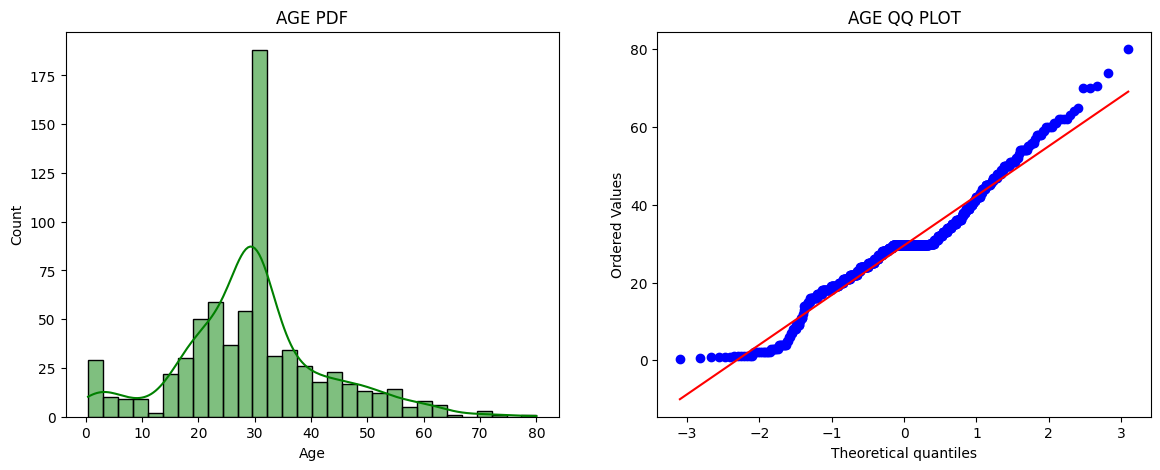

In [7]:
plt.figure(figsize=(14,5))

plt.subplot(121)
sns.histplot(x_train['Age'], kde=True , color='g' , bins=30)
plt.title('AGE PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('AGE QQ PLOT')


Text(0.5, 1.0, 'FARE QQ PLOT')

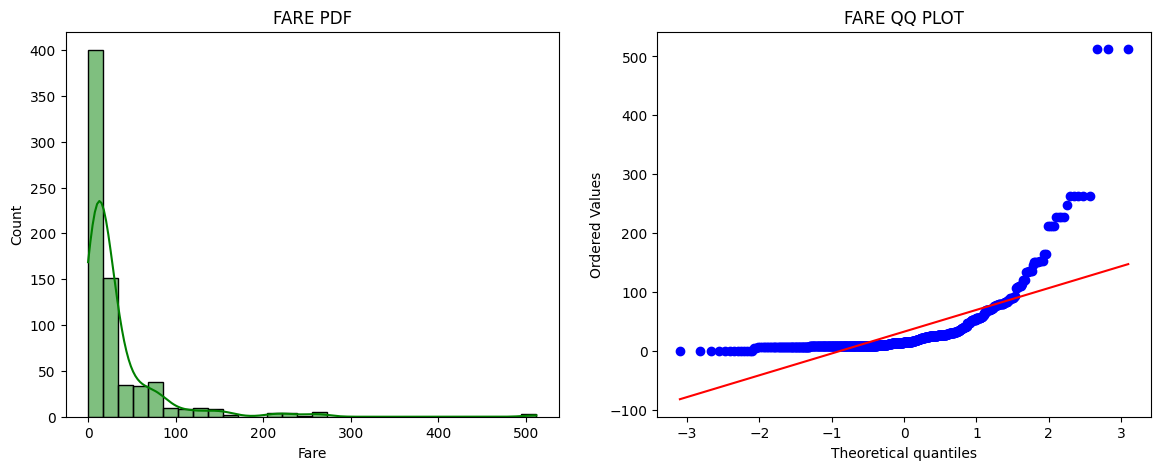

In [8]:
plt.figure(figsize=(14,5))

plt.subplot(121)
sns.histplot(x_train['Fare'] , kde=True , color='g' , bins=30)
plt.title('FARE PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('FARE QQ PLOT')

In [9]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred1 = clf1.predict(x_test) 
y_pred2 = clf2.predict(x_test)

print('accuracy LR',accuracy_score(y_test,y_pred1))
print('accuracy DT',accuracy_score(y_test,y_pred2))

accuracy LR 0.6480446927374302
accuracy DT 0.6536312849162011


In [18]:
trf = FunctionTransformer(func = np.log1p)

x_train_transformed = trf.fit_transform(x_train[['Fare']])
x_test_transformed = trf.transform(x_test[['Fare']])

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred1 = clf1.predict(x_test_transformed) 
y_pred2 = clf2.predict(x_test_transformed)

print('accuracy LR',accuracy_score(y_test,y_pred1))
print('accuracy DT',accuracy_score(y_test,y_pred2))

accuracy LR 0.6815642458100558
accuracy DT 0.6927374301675978


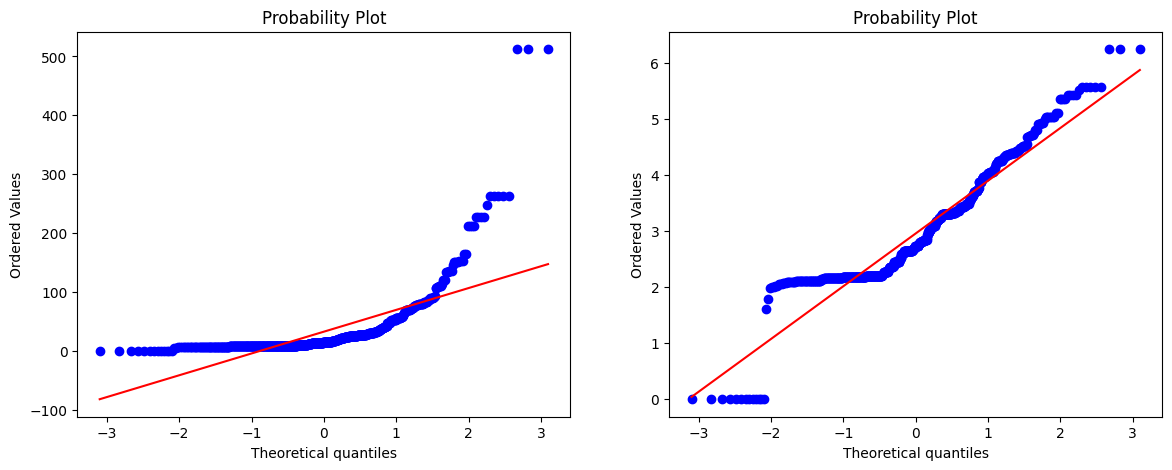

In [19]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.subplot(122)
stats.probplot(x_train_transformed.values.flatten(), dist="norm", plot=plt)
plt.show()